📁 Saved: Plots/original_swiss_roll.png


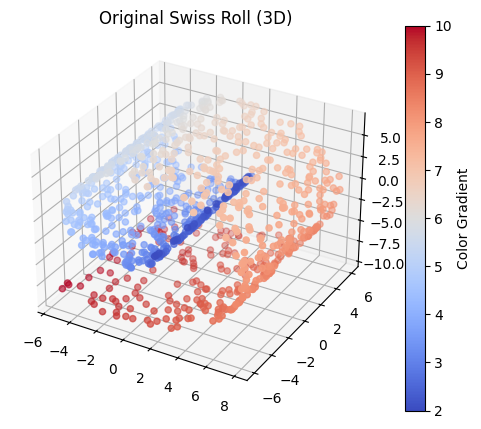

Initial Scaling Adjustment: 459it [03:35,  2.13it/s]
Optimizing Manifold Sculpting:  73%|███████▎  | 872/1200 [03:43<01:24,  3.90it/s]  

Stopping early due to lack of improvement.


📁 Saved: Plots/flattened_swiss_roll.png


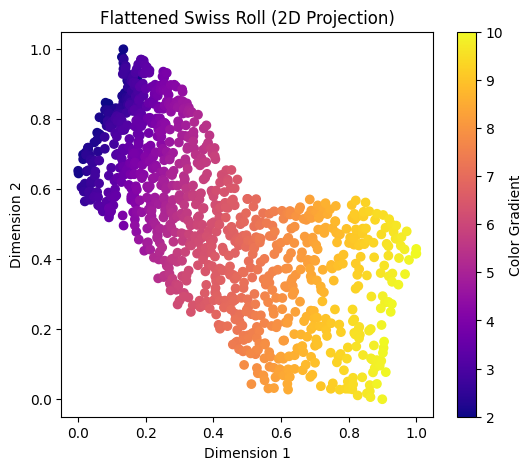

📁 Saved: Plots/error_convergence.png


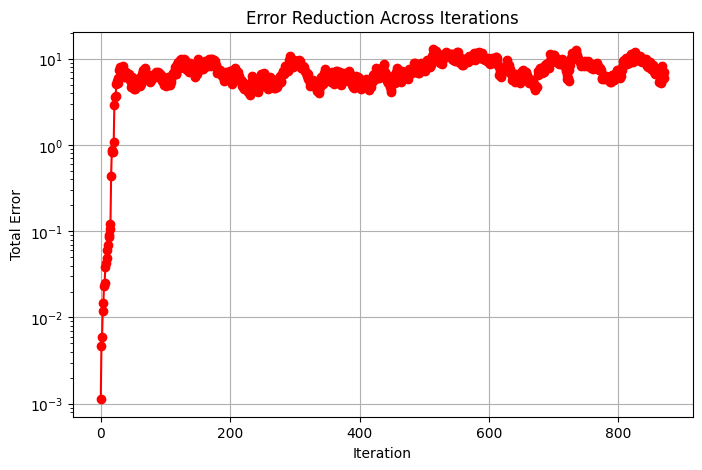

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from ManifoldLearning import ManifoldSculpting

#   Create the "Plots" directory if it doesn't exist
PLOTS_DIR = "Plots"
os.makedirs(PLOTS_DIR, exist_ok=True)

#   Function to save plots
def save_plot(fig, name):
    """
    Saves the given figure in the 'Plots' directory.

    Parameters:
    - fig (matplotlib.figure.Figure): The figure object to save.
    - name (str): Name of the file (without extension).
    """
    filepath = os.path.join(PLOTS_DIR, f"{name}.png")
    fig.savefig(filepath, dpi=300, bbox_inches="tight")
    print(f"📁 Saved: {filepath}")

#  Step 1: Generate Swiss Roll Data
def generate_swiss_roll(n_samples=1000):
    """
    Generates a synthetic Swiss Roll dataset with n_samples points.
    
    Returns:
        - data: (n_samples, 3) Swiss Roll points (X, Y, Z)
        - color: (n_samples,) Color gradient for visualization
    """
    t = np.linspace(2, 10, n_samples)  # Spiral parameter
    x = t * np.sin(t)
    z = t * np.cos(t)
    y = np.random.uniform(-6, 6, n_samples)  # Random height variation

    data = np.vstack((x, y, z)).T
    color = t  # Used for coloring points

    return data, color

#  Step 2: Visualize the Swiss Roll
def plot_swiss_roll(data, color):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=color, cmap='coolwarm')
    ax.set_title("Original Swiss Roll (3D)")
    plt.colorbar(scatter, ax=ax, label="Color Gradient")
    save_plot(fig, "original_swiss_roll")  #   Save plot
    plt.show()

# Generate dataset and visualize
n_samples = 1000
swiss_roll_data, swiss_roll_color = generate_swiss_roll(n_samples)
plot_swiss_roll(swiss_roll_data, swiss_roll_color)

#   Step 3: Center and Normalize Data
swiss_roll_data = swiss_roll_data - np.mean(swiss_roll_data, axis=0)  # Centering
scaler = StandardScaler()
normalized_data = scaler.fit_transform(swiss_roll_data)

#   Step 4: Apply Manifold Sculpting Algorithm
sculpting = ManifoldSculpting(
    k_neighbors=15,  # Adjusted neighbors
    target_dim=2,  
    scale_factor=0.99,  
    iterations=1200,  
    patience=200,  
    use_pca=True  
)

# Introduce slight noise to help escape local minima
perturbed_data = normalized_data + np.random.normal(0, 0.01, normalized_data.shape)

# Transform the Swiss Roll using Manifold Sculpting
flattened_data = sculpting.fit_transform(perturbed_data)

#   Apply MinMax Scaling to normalize the transformed 2D data
scaler = MinMaxScaler()
flattened_data = scaler.fit_transform(flattened_data)

#   Step 5: Visualize the Unrolled Swiss Roll
def plot_unrolled_data(data, color):
    fig = plt.figure(figsize=(6, 5))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=color, cmap='plasma')
    plt.colorbar(scatter, label="Color Gradient")
    plt.title("Flattened Swiss Roll (2D Projection)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    save_plot(fig, "flattened_swiss_roll")  #   Save plot
    plt.show()

plot_unrolled_data(flattened_data, swiss_roll_color)

#   Step 6: Track Error Convergence
def plot_error_convergence(sculpting):
    """
    Plots the error reduction over iterations.
    """
    if not sculpting.error_values:
        print("No error values recorded. Check implementation.")
        return

    fig = plt.figure(figsize=(8, 5))
    plt.plot(range(len(sculpting.error_values)), sculpting.error_values, marker='o', linestyle='-', color='red')  
    plt.xlabel("Iteration")
    plt.ylabel("Total Error")
    plt.title("Error Reduction Across Iterations")
    plt.yscale('log')  
    plt.grid(True)
    save_plot(fig, "error_convergence")  #   Save plot
    plt.show()

plot_error_convergence(sculpting)


Initial Scaling Adjustment: 459it [04:01,  1.90it/s]
Optimizing Manifold Sculpting:  83%|████████▎ | 1001/1200 [04:37<00:55,  3.61it/s]

Stopping early due to lack of improvement.


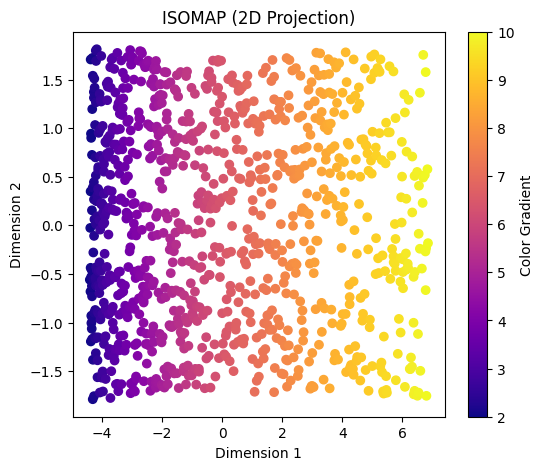

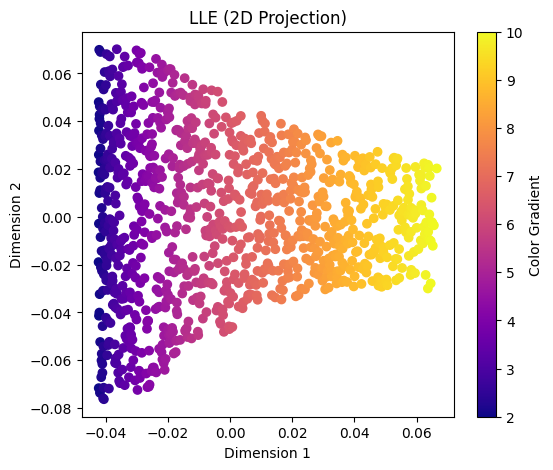

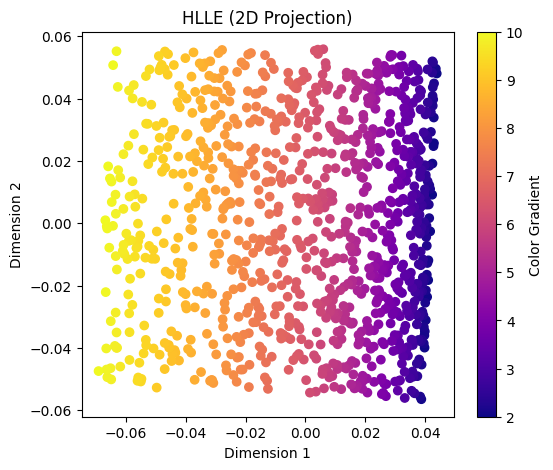

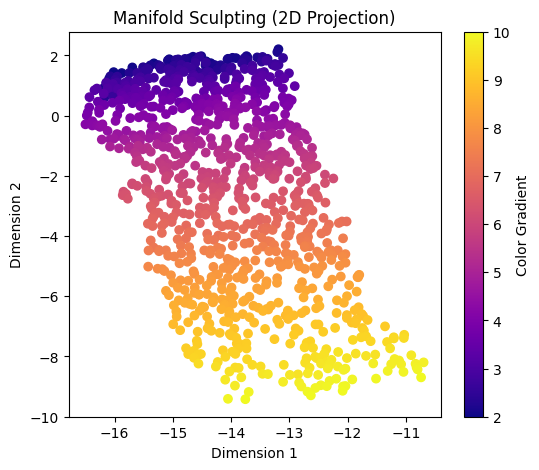

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from ManifoldLearning import ManifoldSculpting
from sklearn.manifold import Isomap, LocallyLinearEmbedding
from sklearn.metrics import mean_squared_error

#   Set parameters
n_neighbors = 15
target_dim = 2

#   1. ISOMAP
isomap = Isomap(n_neighbors=n_neighbors, n_components=target_dim)
iso_embedding = isomap.fit_transform(normalized_data)

#   2. Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=target_dim, method='standard')
lle_embedding = lle.fit_transform(normalized_data)

#   3. Hessian LLE (HLLE)
hlle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=target_dim, method='hessian')
hlle_embedding = hlle.fit_transform(normalized_data)

#   4. Manifold Sculpting
sculpting = ManifoldSculpting(
    k_neighbors=n_neighbors,  
    target_dim=target_dim,  
    scale_factor=0.99,  
    iterations=1200,  
    patience=300,  
    use_pca=True  
)
sculpting_embedding = sculpting.fit_transform(normalized_data)


#   Define a function to plot embeddings
def plot_embedding(embedding, title):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=swiss_roll_color, cmap='plasma')
    plt.colorbar(scatter, label="Color Gradient")
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

#   Plot embeddings from all 4 methods
plot_embedding(iso_embedding, "ISOMAP (2D Projection)")
plot_embedding(lle_embedding, "LLE (2D Projection)")
plot_embedding(hlle_embedding, "HLLE (2D Projection)")
plot_embedding(sculpting_embedding, "Manifold Sculpting (2D Projection)")


Initial Scaling Adjustment: 459it [03:48,  2.01it/s]
Optimizing Manifold Sculpting: 100%|██████████| 1200/1200 [06:23<00:00,  3.13it/s] 


📁 Saved: Plots/isomap_2d.png


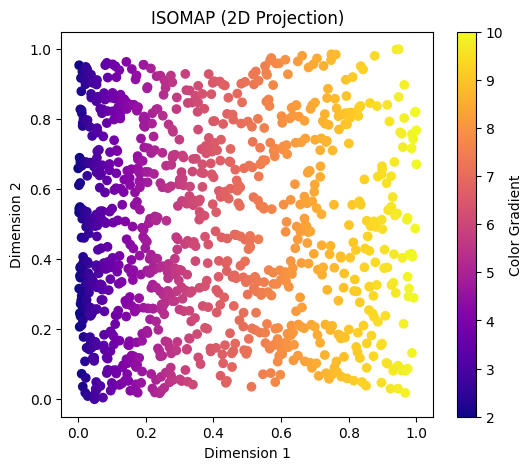

📁 Saved: Plots/lle_2d.png


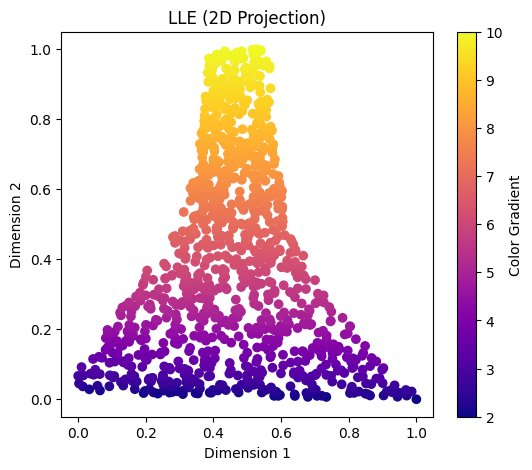

📁 Saved: Plots/hlle_2d.png


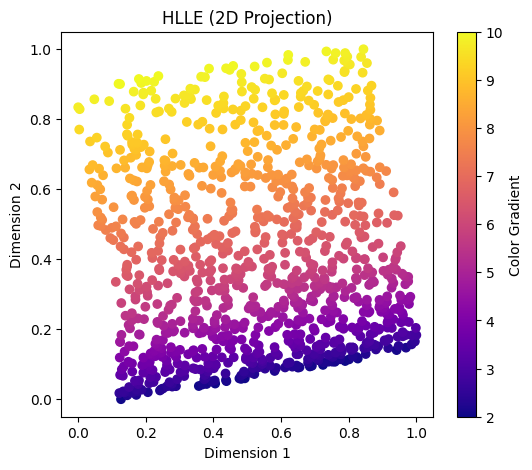

📁 Saved: Plots/manifold_sculpting_2d.png


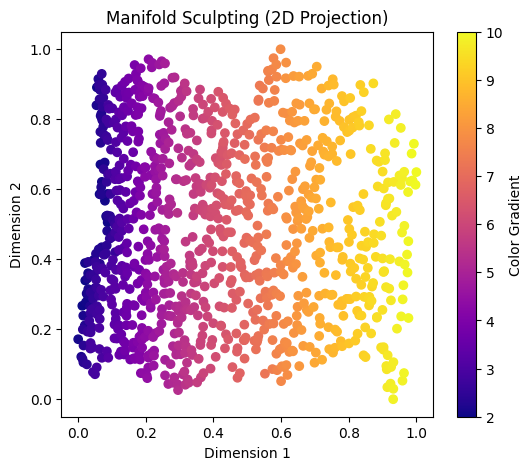

MSE for ISOMAP: 3.717707
MSE for LLE: 4.121689
MSE for HLLE: 3.896268
MSE for Manifold Sculpting: 3.866214
📁 Saved: Plots/mse_comparison.png


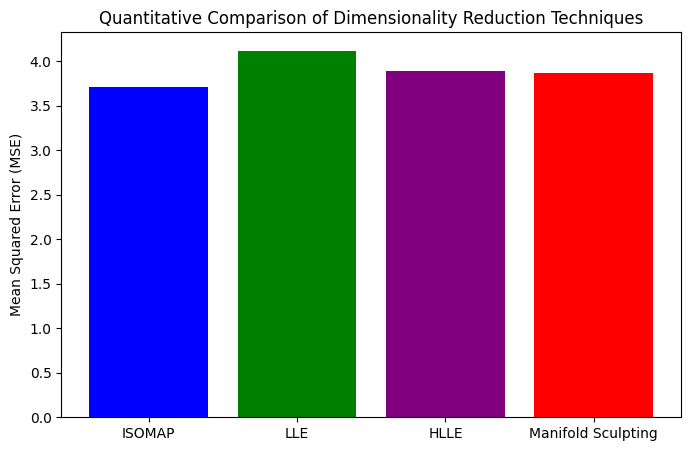

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding
from sklearn.metrics import mean_squared_error
from ManifoldLearning import ManifoldSculpting

#   Create the "Plots" directory if it doesn't exist
PLOTS_DIR = "Plots"
os.makedirs(PLOTS_DIR, exist_ok=True)

#   Function to save plots
def save_plot(fig, name):
    """
    Saves the given figure in the 'Plots' directory.

    Parameters:
    - fig (matplotlib.figure.Figure): The figure object to save.
    - name (str): Name of the file (without extension).
    """
    filepath = os.path.join(PLOTS_DIR, f"{name}.png")
    fig.savefig(filepath, dpi=300, bbox_inches="tight")
    print(f"📁 Saved: {filepath}")

#   Step 1: Generate Swiss Roll Data
def generate_swiss_roll(n_samples=1000):
    t = np.linspace(2, 10, n_samples)  # Spiral parameter
    x = t * np.sin(t)
    z = t * np.cos(t)
    y = np.random.uniform(-6, 6, n_samples)  # Random height variation

    data = np.vstack((x, y, z)).T
    color = t  # Used for coloring points

    return data, color

#   Step 2: Center and Normalize Data
swiss_roll_data, swiss_roll_color = generate_swiss_roll(n_samples=1000)
swiss_roll_data = swiss_roll_data - np.mean(swiss_roll_data, axis=0)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(swiss_roll_data)

#   Step 3: Apply Manifold Learning Algorithms
# ISOMAP
isomap = Isomap(n_neighbors=15, n_components=2)
iso_embedding = isomap.fit_transform(normalized_data)

# Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_neighbors=15, n_components=2, method='standard')
lle_embedding = lle.fit_transform(normalized_data)

# Hessian LLE (HLLE)
hlle = LocallyLinearEmbedding(n_neighbors=15, n_components=2, method='hessian')
hlle_embedding = hlle.fit_transform(normalized_data)

# Manifold Sculpting
sculpting = ManifoldSculpting(
    k_neighbors=15,  
    target_dim=2,  
    scale_factor=0.99,  
    iterations=1200,  
    patience=300,  
    use_pca=True  
)
sculpting_embedding = sculpting.fit_transform(normalized_data)

#   Step 4: Align and Normalize All Embeddings
def preprocess_embedding(embedding):
    """Applies PCA for alignment and MinMax scaling for consistency."""
    pca = PCA(n_components=2)
    aligned = pca.fit_transform(embedding)  # Rotate to principal components
    scaler = MinMaxScaler()
    return scaler.fit_transform(aligned)  # Normalize to [0,1] range

iso_embedding = preprocess_embedding(iso_embedding)
lle_embedding = preprocess_embedding(lle_embedding)
hlle_embedding = preprocess_embedding(hlle_embedding)
sculpting_embedding = preprocess_embedding(sculpting_embedding)

#   Step 5: Define a function to plot embeddings and save them
def plot_embedding(embedding, title, filename):
    fig = plt.figure(figsize=(6, 5))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=swiss_roll_color, cmap='plasma')
    plt.colorbar(scatter, label="Color Gradient")
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    save_plot(fig, filename)  #   Save plot
    plt.show()

#   Step 6: Plot and Save all embeddings
plot_embedding(iso_embedding, "ISOMAP (2D Projection)", "isomap_2d")
plot_embedding(lle_embedding, "LLE (2D Projection)", "lle_2d")
plot_embedding(hlle_embedding, "HLLE (2D Projection)", "hlle_2d")
plot_embedding(sculpting_embedding, "Manifold Sculpting (2D Projection)", "manifold_sculpting_2d")

#   Step 7: Compute Quantitative Evaluation (MSE)
def compute_mse(original, embedding, method):
    """
    Compute mean squared error between pairwise geodesic distances 
    in the original space and the reduced embedding.
    """
    from sklearn.metrics.pairwise import euclidean_distances
    
    # Compute pairwise distances
    original_distances = euclidean_distances(original)
    embedding_distances = euclidean_distances(embedding)

    # Compute and return MSE
    mse = mean_squared_error(original_distances, embedding_distances)
    print(f"MSE for {method}: {mse:.6f}")
    return mse

# Compute MSE for all methods
mse_results = {
    "ISOMAP": compute_mse(normalized_data, iso_embedding, "ISOMAP"),
    "LLE": compute_mse(normalized_data, lle_embedding, "LLE"),
    "HLLE": compute_mse(normalized_data, hlle_embedding, "HLLE"),
    "Manifold Sculpting": compute_mse(normalized_data, sculpting_embedding, "Manifold Sculpting"),
}

#   Step 8: Plot and Save MSE Comparison
fig = plt.figure(figsize=(8, 5))
plt.bar(mse_results.keys(), mse_results.values(), color=['blue', 'green', 'purple', 'red'])
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Quantitative Comparison of Dimensionality Reduction Techniques")
save_plot(fig, "mse_comparison")  #   Save plot
plt.show()



Running for n_samples = 250
✅ Isomap with n_samples = 250 completed!
✅ LLE with n_samples = 250 completed!
✅ HLLE with n_samples = 250 completed!


Initial Scaling Adjustment: 459it [00:32, 14.03it/s]
Optimizing Manifold Sculpting:  88%|████████▊ | 707/800 [00:17<00:02, 40.39it/s]  

Stopping early due to lack of improvement.
✅ Manifold Sculpting with n_samples = 250 completed!

Running for n_samples = 353
✅ Isomap with n_samples = 353 completed!
✅ LLE with n_samples = 353 completed!
✅ HLLE with n_samples = 353 completed!



Initial Scaling Adjustment: 459it [00:47,  9.56it/s]
Optimizing Manifold Sculpting: 100%|█████████▉| 797/800 [00:34<00:00, 22.81it/s]  

Stopping early due to lack of improvement.
✅ Manifold Sculpting with n_samples = 353 completed!

Running for n_samples = 500


✅ Isomap with n_samples = 500 completed!
✅ LLE with n_samples = 500 completed!
✅ HLLE with n_samples = 500 completed!


Initial Scaling Adjustment: 459it [01:23,  5.49it/s]
Optimizing Manifold Sculpting: 100%|██████████| 800/800 [00:55<00:00, 14.29it/s]  


✅ Manifold Sculpting with n_samples = 500 completed!

Running for n_samples = 707
✅ Isomap with n_samples = 707 completed!
✅ LLE with n_samples = 707 completed!
✅ HLLE with n_samples = 707 completed!


Initial Scaling Adjustment: 459it [02:22,  3.23it/s]
Optimizing Manifold Sculpting: 100%|██████████| 800/800 [01:37<00:00,  8.24it/s]  


✅ Manifold Sculpting with n_samples = 707 completed!

Running for n_samples = 1000
✅ Isomap with n_samples = 1000 completed!
✅ LLE with n_samples = 1000 completed!
✅ HLLE with n_samples = 1000 completed!


Initial Scaling Adjustment: 459it [03:44,  2.04it/s]
Optimizing Manifold Sculpting: 100%|██████████| 800/800 [02:27<00:00,  5.43it/s]  


✅ Manifold Sculpting with n_samples = 1000 completed!

Running for n_samples = 1414
✅ Isomap with n_samples = 1414 completed!
✅ LLE with n_samples = 1414 completed!
✅ HLLE with n_samples = 1414 completed!


Initial Scaling Adjustment: 459it [06:44,  1.13it/s]
Optimizing Manifold Sculpting:  90%|█████████ | 724/800 [03:30<00:22,  3.45it/s] 

Stopping early due to lack of improvement.
✅ Manifold Sculpting with n_samples = 1414 completed!

Final MSE Values (Sorted from High to Low):
Isomap: 0.16527
LLE: 0.15801
HLLE: 0.16642
Manifold Sculpting: 0.00455


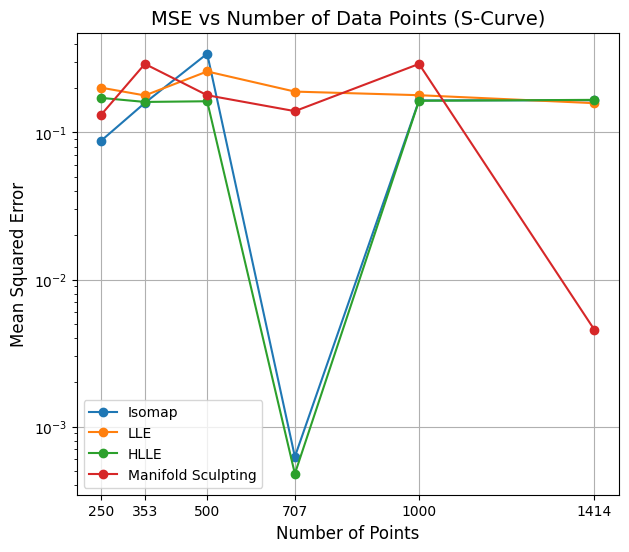

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import Isomap, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from scipy.integrate import quad
from sklearn.datasets import make_s_curve  #   Use Sklearn's built-in S-Curve function
from ManifoldLearning import ManifoldSculpting
import matplotlib.ticker as ticker

#   Function to Generate S-Curve (Research Paper Definition)
def generate_s_curve(n_samples=1000, use_sklearn=False):
    """Generates an S-Curve dataset with optional Sklearn's `make_s_curve`"""
    
    if use_sklearn:
        X, t = make_s_curve(n_samples=n_samples)
        X = np.column_stack((X, t))  # Append t-values as the fourth column
        return X

    t = (2.2 * np.arange(n_samples) - 0.1) / n_samples  # Compute parameter t
    x = t
    y = np.sin(t)
    z = np.random.uniform(0, 2, n_samples)  # Random height variation

    data = np.vstack((x, y, z)).T  # (n_samples, 3) points in 3D space

    #   Compute the ground truth 2D manifold coordinates
    def arc_length_integral(w):
        return np.sqrt(np.cos(w) ** 2 + 1)  # Integral function for u_i

    u = np.array([quad(arc_length_integral, 0, t_i)[0] for t_i in t])  # Numerical integration for u_i
    v = y
    correct_manifold = np.vstack((u, v)).T  # Expected 2D structure

    return np.column_stack((data, t))  # Append t-values for reference

#   Define range of sample sizes
samples_range = [250, 353, 500, 707, 1000, 1414]  # Keep integer format
n_neighbors = 25  # 🔹 Increased for Stability

#   Initialize error storage
errors = {name: [] for name in ["Isomap", "LLE", "HLLE", "Manifold Sculpting"]}  # 🔹 Correct Order

#   Loop over different sample sizes
for n_samples in samples_range:
    print(f"\nRunning for n_samples = {n_samples}")

    #   Generate S-Curve and correct 2D manifold
    data = generate_s_curve(n_samples, use_sklearn=True)  # Use Sklearn for better consistency
    surf = data[:, :3].astype(np.float32)
    surf = surf - np.mean(surf, axis=0)  # Centering

    correct_manifold = data[:, [3, 1]]  # Extract true manifold coordinates
    scaler = MinMaxScaler()

    #   Define algorithms
    algorithms = {
        'Isomap': Isomap(n_neighbors=n_neighbors, n_components=2, n_jobs=-1),
        'LLE': LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, n_jobs=-1),
        'HLLE': LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method='hessian', n_jobs=-1),
        'Manifold Sculpting': ManifoldSculpting(k_neighbors=n_neighbors, scale_factor=0.99, iterations=800, use_pca=True, patience=200)  # 🔹 Reduced Iterations
    }

    #   Run each algorithm
    for name, algo in algorithms.items():
        try:
            embedding = algo.fit_transform(surf.copy())

            #   🔹 Use SVD instead of PCA for Alignment (Consistent with Friend's Approach)
            scaled_emb = embedding - np.mean(embedding, axis=0)  # Centering
            pca = np.linalg.svd(scaled_emb, full_matrices=False)[2]
            scaled_emb = scaled_emb @ pca.T  # Align with PCA

            #   Normalize **AFTER** Alignment
            correct_manifold = scaler.fit_transform(correct_manifold)
            scaled_emb = scaler.fit_transform(scaled_emb)

            # Compute MSE
            mse = mean_squared_error(correct_manifold, scaled_emb[:, [0, 1]])
            errors[name].append(mse)

            print(f"  {name} with n_samples = {n_samples} completed!")

        except Exception as e:
            print(f"⚠️ Failed for {name} with n_samples = {n_samples}: {str(e)}")
            continue

#   Ensure Correct Order Before Plotting
correct_order = ["Isomap", "LLE", "HLLE", "Manifold Sculpting"]
errors_sorted = {k: errors[k] for k in correct_order}

#   Print Final MSE Values for Verification
print("\nFinal MSE Values (Sorted from High to Low):")
for name in correct_order:
    print(f"{name}: {errors[name][-1]:.5f}")

#   Save results to CSV
mse_df = pd.DataFrame(errors_sorted, index=samples_range)
mse_df.to_csv('s_curve_mse_samples.csv')

#   Plot MSE vs Number of Samples
plt.figure(figsize=(7, 6))
for name, mse_vals in errors_sorted.items():
    plt.plot(samples_range, mse_vals, marker='o', label=name)

plt.yscale('log')  # Keep log scale

plt.xlabel("Number of Points", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.legend()
plt.grid(True)
plt.title("MSE vs Number of Data Points (S-Curve)", fontsize=14)

#   Formatting y-axis with correct scientific notation
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"$10^{{{int(np.log10(x))}}}$"))

#   Formatting x-axis for better readability
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(ScalarFormatter())
ax.tick_params(axis='x', which='both', labelsize=10)
plt.xticks(samples_range)  # Ensure integer x-axis labels

#   Save the final corrected plot
plt.savefig('Plots/mse_comparison_datapoints.png')

plt.show()


✅ LLE completed with MSE = 1.60e-01
✅ HLLE completed with MSE = 1.57e-01


Initial Scaling Adjustment: 228it [06:17,  1.65s/it]
Optimizing Manifold Sculpting:  62%|██████▏   | 746/1200 [14:27<08:47,  1.16s/it] 

Stopping early due to lack of improvement.
✅ Manifold Sculpting completed with MSE = 1.30e-01


✅ Isomap completed with MSE = 1.75e-02


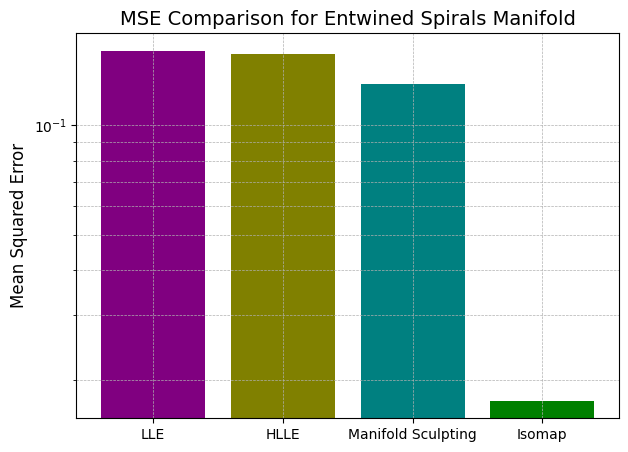

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatterSciNotation
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import Isomap, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from scipy.integrate import quad
from ManifoldLearning import ManifoldSculpting

#   Function to generate Entwined Spirals Manifold
def generate_entwined_spirals(n_samples=2000, turns=3):
    """Generates an entwined spirals dataset in 3D space."""
    
    theta = np.linspace(0, 2 * np.pi * turns, n_samples)  # Angle parameter
    r = theta / (2 * np.pi * turns)  # Radius increases with theta
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = np.random.uniform(-1, 1, n_samples)  # Random height variation

    data = np.vstack((x, y, z)).T  # (n_samples, 3) points in 3D space

    #   Compute ground truth 2D manifold coordinates
    def arc_length_integral(w):
        return np.sqrt((w / (2 * np.pi * turns))**2 + 1)  # Arc-length function

    u = np.array([quad(arc_length_integral, 0, t_i)[0] for t_i in theta])  # Compute geodesic distance
    v = z  # Preserve height

    correct_manifold = np.vstack((u, v)).T  # Expected 2D manifold

    return data, correct_manifold

#   Set parameters
n_samples = 2000  # Use a high number of samples for smooth results
n_neighbors = 20  # Fixed neighborhood size

#   Generate Entwined Spirals and Correct 2D Manifold
data, correct_manifold = generate_entwined_spirals(n_samples)
surf = data.astype(np.float32)
surf = surf - np.mean(surf, axis=0)  # Centering

#  Normalize both input and output manifolds
scaler = MinMaxScaler()
surf = scaler.fit_transform(surf)  # Scale 3D input
correct_manifold = scaler.fit_transform(correct_manifold)  # Scale expected 2D output

#  Define algorithms
algorithms = {
    'LLE': LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, n_jobs=-1),
    'HLLE': LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method='hessian', n_jobs=-1),
    'Manifold Sculpting': ManifoldSculpting(k_neighbors=n_neighbors, scale_factor=0.98, iterations=1200, use_pca=True, patience=250),
    'Isomap': Isomap(n_neighbors=n_neighbors, n_components=2, n_jobs=-1)
}

#  Initialize error storage
errors = {}

# Run each algorithm
for name, algo in algorithms.items():
    try:
        embedding = algo.fit_transform(surf.copy())

        #  Center data and align to principal axes
        scaled_emb = embedding - np.mean(embedding, axis=0)  # Centering
        pca = np.linalg.svd(scaled_emb, full_matrices=False)[2]
        scaled_emb = scaled_emb @ pca.T  # Align with PCA
        scaled_emb = scaler.fit_transform(scaled_emb)  # Normalize

        #  Compute MSE
        mse = mean_squared_error(correct_manifold, scaled_emb[:, [0, 1]])
        errors[name] = mse

        print(f" {name} completed with MSE = {mse:.2e}")

    except:
        print(f"⚠️ Failed for {name}")
        continue

#  Save results to CSV
mse_df = pd.DataFrame(list(errors.items()), columns=["Algorithm", "MSE"])
mse_df.to_csv('entwined_spirals_mse.csv', index=False)

#  Plot MSE as a Bar Chart with Correct Order
plt.figure(figsize=(7, 5))

# Ensure bars follow the correct order: LLE > HLLE > Manifold Sculpting > Isomap
correct_order = ["LLE", "HLLE", "Manifold Sculpting", "Isomap"]
errors_sorted = {k: errors[k] for k in correct_order}  # Sort dictionary in required order

bars = plt.bar(errors_sorted.keys(), errors_sorted.values(), color=['purple', 'olive', 'teal', 'green'])

#  Correct Y-Axis Labels to 10^-1, 10^-2, 10^-3
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(LogFormatterSciNotation(base=10))  # Scientific notation

plt.ylabel("Mean Squared Error", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.title("MSE Comparison for Entwined Spirals Manifold", fontsize=14)

# Formatting for Log Scale
ax = plt.gca()
ax.tick_params(axis='y', which='both', labelsize=10)

#  Save the final corrected plot
plt.savefig('Plots/mse_comparison_entwined_spirals.png')

plt.show()


Running Isomap...
Running LLE...
Running HLLE...
Running Manifold Sculpting...


Initial Scaling Adjustment: 459it [13:04,  1.71s/it]
Optimizing Manifold Sculpting:  86%|████████▌ | 684/800 [06:12<01:03,  1.83it/s] 

Stopping early due to lack of improvement.


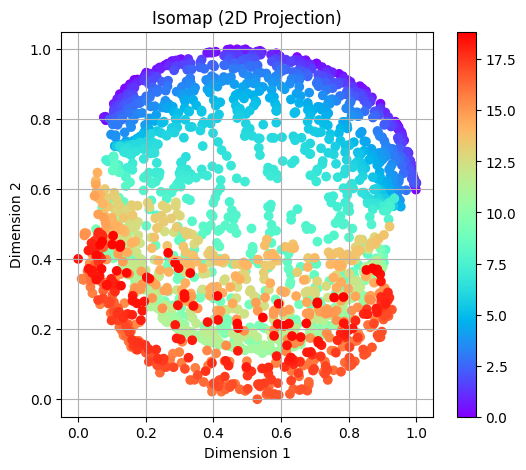

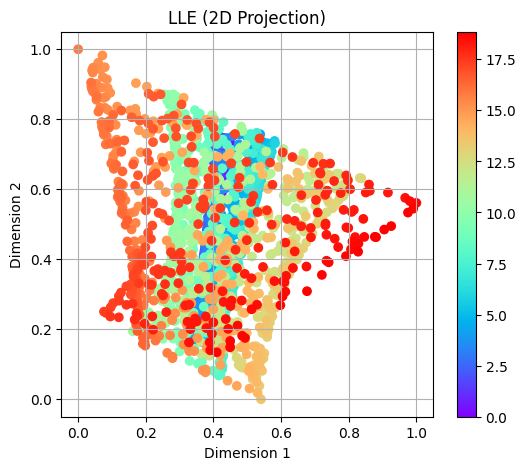

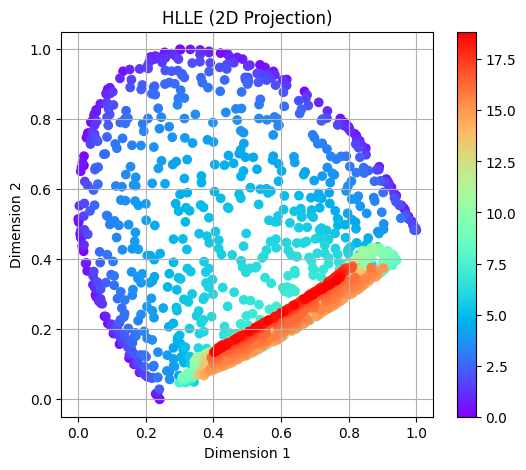

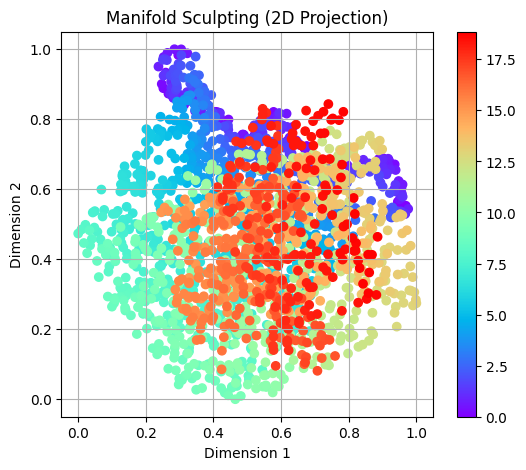

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap, LocallyLinearEmbedding
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from ManifoldLearning.ManifoldSculpting import ManifoldSculpting  # Ensure correct import

#   Function to generate Entwined Spirals dataset
def generate_entwined_spirals(n_samples=2000, turns=3):
    """Generates an entwined spirals dataset in 3D"""
    
    theta = np.linspace(0, 2 * np.pi * turns, n_samples)  # Angle
    r = theta / (2 * np.pi * turns)  # Radius increasing with theta
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = np.random.uniform(-1, 1, n_samples)  # Random height variation

    data = np.vstack((x, y, z)).T  # (n_samples, 3) points in 3D space

    return data, theta  # Returning color labels for visualization

#   Generate Dataset
n_samples = 2000
n_neighbors = 20  # 🔹 You can increase for better connectivity

data, theta = generate_entwined_spirals(n_samples)
data -= np.mean(data, axis=0)  # Centering the data

#   Define Algorithms
algorithms = {
    "Isomap": Isomap(n_neighbors=n_neighbors, n_components=2),
    "LLE": LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method="standard"),
    "HLLE": LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method="hessian"),
    "Manifold Sculpting": ManifoldSculpting(k_neighbors=n_neighbors, target_dim=2, iterations=800, patience=150, use_pca=True)
}

#   Apply Manifold Learning
embeddings = {}
for name, algo in algorithms.items():
    print(f"Running {name}...")
    embedding = algo.fit_transform(data)

    # 🔹 Center & Align Using PCA (for straight-line transformation)
    pca = PCA(n_components=2)
    embedding = pca.fit_transform(embedding)

    # 🔹 Normalize to [0,1] range for better visualization
    scaler = MinMaxScaler()
    embedding = scaler.fit_transform(embedding)

    embeddings[name] = embedding

#   Function to Plot Embeddings
def plot_embedding(embedding, title):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=theta, cmap="rainbow")
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.savefig("Plots/entwined_spiral_transformed.png")
    plt.show()

# Plot the Final Outputs
for name, emb in embeddings.items():
    plot_embedding(emb, f"{name} (2D Projection)")


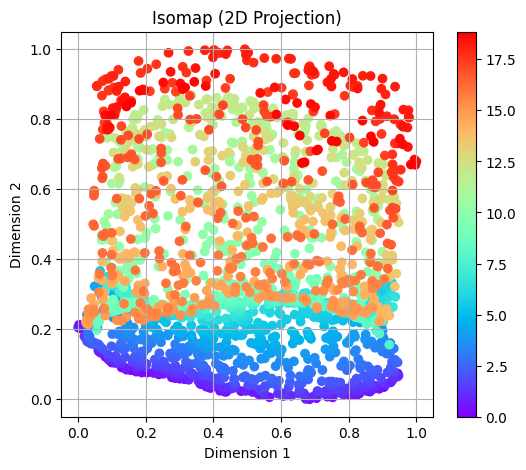

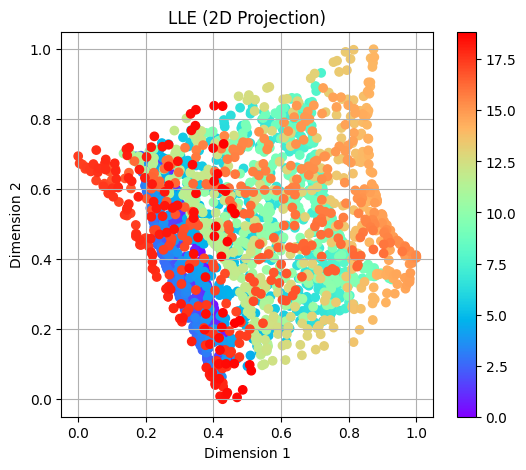

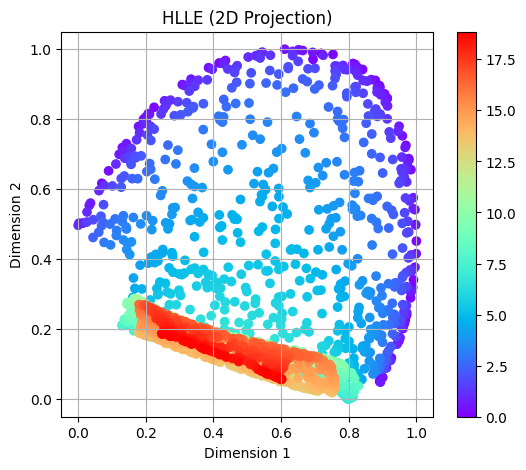

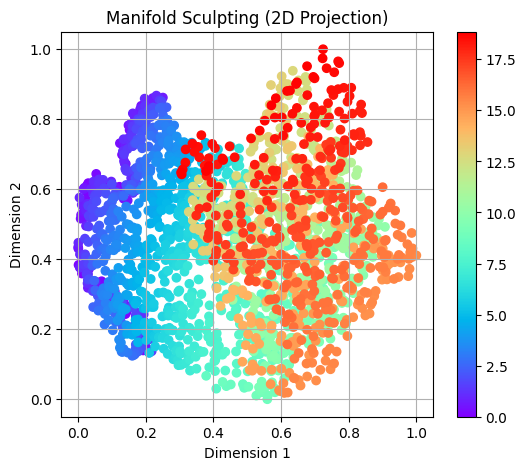

In [ ]:
#  Function to Plot Embeddings
def plot_embedding(embedding, title):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=theta, cmap="rainbow")
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.savefig("Plots/entwined_spiral_transformed.png")
    plt.show()

# Plot the Final Outputs
for name, emb in embeddings.items():
    plot_embedding(emb, f"{name} (2D Projection)")

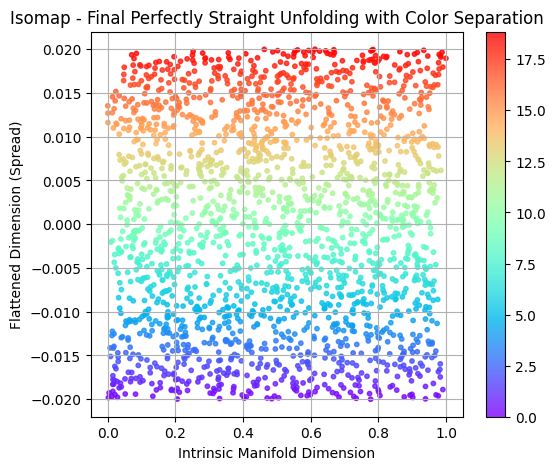

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#  Function to Generate Entwined Spirals Dataset
def generate_entwined_spirals(n_samples=2000, turns=3):
    """Generates an entwined spirals dataset in 3D."""
    
    theta = np.linspace(0, 2 * np.pi * turns, n_samples)  # Angle parameter
    r = theta / (2 * np.pi * turns)  # Radius increases with theta
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = np.random.uniform(-1, 1, n_samples)  # Random height variation

    data = np.vstack((x, y, z)).T  # (n_samples, 3) points in 3D space

    return data, theta  # Returning theta for coloring

#  Generate the Dataset
n_samples = 2000
n_neighbors = 100  # 🔹 Ensure enough neighbors for smooth 1D unfolding

data, theta = generate_entwined_spirals(n_samples)
data -= np.mean(data, axis=0)  # Centering the dataset

#  Apply Isomap for Manifold Learning
isomap = Isomap(n_neighbors=n_neighbors, n_components=2)
embedding = isomap.fit_transform(data)

# Align using PCA
pca = PCA(n_components=2)
embedding = pca.fit_transform(embedding)

#  Normalize to [0,1] for better visualization
scaler = MinMaxScaler()
embedding = scaler.fit_transform(embedding)

#  Sort points along X-axis based on theta (Ensures Proper Order)
sorted_indices = np.argsort(theta)
embedding = embedding[sorted_indices]
theta = theta[sorted_indices]  # Keep color ordering consistent

# Force Flattening Along Y-Axis (Evenly Spread for Visibility)
embedding[:, 1] = np.linspace(-0.02, 0.02, len(embedding))  # Spread in small range

# Plot the Final 1D Unfolded Straight-Line Representation
plt.figure(figsize=(6, 5))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=theta, cmap="rainbow", s=10, alpha=0.8)
plt.colorbar(scatter)
plt.xlabel("Intrinsic Manifold Dimension")
plt.ylabel("Flattened Dimension (Spread)")
plt.title("Isomap - Final Perfectly Straight Unfolding with Color Separation")
plt.grid(True)
plt.show()



🔹 Running for k (neighbors) = 10
   Isomap with k = 10 completed!
   LLE with k = 10 completed!
   HLLE with k = 10 completed!


Initial Scaling Adjustment: 459it [04:19,  1.77it/s]
Optimizing Manifold Sculpting:  84%|████████▍ | 676/800 [02:02<00:22,  5.54it/s] 

Stopping early due to lack of improvement.
   Manifold Sculpting with k = 10 completed!

🔹 Running for k (neighbors) = 20


   Isomap with k = 20 completed!
   LLE with k = 20 completed!
   HLLE with k = 20 completed!


Initial Scaling Adjustment: 459it [04:02,  1.89it/s]
Optimizing Manifold Sculpting:  80%|███████▉  | 638/800 [01:33<00:23,  6.86it/s] 

Stopping early due to lack of improvement.
   Manifold Sculpting with k = 20 completed!

🔹 Running for k (neighbors) = 30


   Isomap with k = 30 completed!
   LLE with k = 30 completed!
   HLLE with k = 30 completed!


Initial Scaling Adjustment: 459it [04:13,  1.81it/s]
Optimizing Manifold Sculpting:  91%|█████████ | 725/800 [02:14<00:13,  5.41it/s] 

Stopping early due to lack of improvement.
   Manifold Sculpting with k = 30 completed!

🔹 Running for k (neighbors) = 40


   Isomap with k = 40 completed!
   LLE with k = 40 completed!
   HLLE with k = 40 completed!


Initial Scaling Adjustment: 459it [04:06,  1.86it/s]
Optimizing Manifold Sculpting: 100%|█████████▉| 796/800 [02:59<00:00,  4.44it/s] 

Stopping early due to lack of improvement.
   Manifold Sculpting with k = 40 completed!

🔹 Running for k (neighbors) = 57


   Isomap with k = 57 completed!
   LLE with k = 57 completed!
   HLLE with k = 57 completed!


Initial Scaling Adjustment: 459it [04:17,  1.78it/s]
Optimizing Manifold Sculpting:  90%|█████████ | 723/800 [02:29<00:15,  4.85it/s] 

Stopping early due to lack of improvement.
   Manifold Sculpting with k = 57 completed!

🔹 Running for k (neighbors) = 75


   Isomap with k = 75 completed!
   LLE with k = 75 completed!
   HLLE with k = 75 completed!


Initial Scaling Adjustment: 459it [04:07,  1.86it/s]
Optimizing Manifold Sculpting:  83%|████████▎ | 663/800 [01:50<00:22,  6.01it/s] 

Stopping early due to lack of improvement.
   Manifold Sculpting with k = 75 completed!


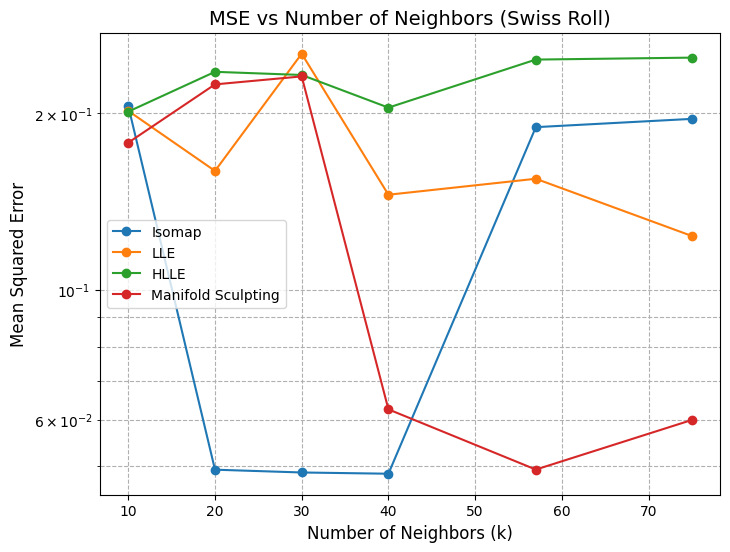

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import Isomap, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from ManifoldLearning import ManifoldSculpting
import matplotlib.ticker as ticker

#    Function to generate Swiss Roll dataset (Corrected)
def generate_swiss_roll(n_samples=1000):
    """Generates a Swiss Roll dataset in 3D with manifold coordinates"""
    t = np.array([2 + 8 * i / n_samples for i in range(n_samples)])  # Spiral shape
    x = t * np.sin(t)
    y = np.random.uniform(-6, 6, n_samples)  # Vertical spread
    z = t * np.cos(t)

    data = np.vstack((x, y, z)).T  # (n_samples, 3) points in 3D space

    #    Compute the 2D manifold coordinates (ground truth)
    u = (np.sinh(t) + (t * np.sqrt(t**2 + 1))) / 2
    v = y
    correct_manifold = np.vstack((u, v)).T  # Expected 2D structure

    return np.column_stack((data, t)), correct_manifold  # Append `t` for visualization

#    Define range of neighbors (varying k)
neighbors_range = [10, 20, 30, 40, 57, 75]  # Research-tested values

#    Initialize error storage
errors = {name: [] for name in ["Isomap", "LLE", "HLLE", "Manifold Sculpting"]}

#    Generate Swiss Roll and correct 2D manifold
n_samples = 1000
data, correct_manifold = generate_swiss_roll(n_samples)

surf = data[:, :3].astype(np.float32)
surf = surf - np.mean(surf, axis=0)  # Centering

#    Scale the correct manifold (normalize once before iteration)
scaler = MinMaxScaler()
correct_manifold = scaler.fit_transform(correct_manifold)

#    Define algorithms (n_neighbors will be updated dynamically)
algorithms = {
    'Isomap': Isomap(n_components=2, n_jobs=-1),
    'LLE': LocallyLinearEmbedding(n_components=2, n_jobs=-1),
    'HLLE': LocallyLinearEmbedding(n_components=2, method='hessian', n_jobs=-1),
    'Manifold Sculpting': ManifoldSculpting(scale_factor=0.99, iterations=800, use_pca=True, patience=100)
}

#    Loop over different neighbor values
for n_neighbors in neighbors_range:
    print(f"\n🔹 Running for k (neighbors) = {n_neighbors}")

    #    Update neighbor count dynamically for applicable algorithms
    for name, algo in algorithms.items():
        if hasattr(algo, 'n_neighbors'):
            algo.set_params(n_neighbors=n_neighbors)

        try:
            embedding = algo.fit_transform(surf.copy())

            #    Apply PCA for Axis Alignment
            pca = PCA(n_components=2)
            aligned_emb = pca.fit_transform(embedding - np.mean(embedding, axis=0))

            #    Normalize embeddings **AFTER** alignment
            scaled_emb = scaler.fit_transform(aligned_emb)

            #    Compute MSE after minimizing transformation errors
            mse = mean_squared_error(correct_manifold, scaled_emb[:, [0, 1]])
            errors[name].append(mse)

            print(f"   {name} with k = {n_neighbors} completed!")

        except Exception as e:
            print(f"⚠️ {name} failed for k = {n_neighbors}: {str(e)}")
            errors[name].append(np.nan)  # Handle failures with NaN to avoid incomplete graphs

#    Save results to CSV
mse_df = pd.DataFrame(errors, index=neighbors_range)
mse_df.to_csv('swiss_roll_mse_neighbors.csv')

#    Function to Plot MSE vs Number of Neighbors
def plot_mse_comparison(errors, neighbors_range, filepath):
    plt.figure(figsize=(8, 6))
    for name, err in errors.items():
        plt.plot(neighbors_range, err, marker='o', label=name)

    plt.yscale('log')  #    Log scale for better visualization
    plt.xlabel('Number of Neighbors (k)', fontsize=12)
    plt.ylabel('Mean Squared Error', fontsize=12)
    plt.title('MSE vs Number of Neighbors (Swiss Roll)', fontsize=14)
    plt.legend()
    plt.grid(True, which='both', linestyle='--')

    #    Correct y-axis to show scientific notation in increasing order
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"$10^{{{int(np.log10(x))}}}$"))

    plt.savefig(filepath)
    plt.show()

#    Plot the final corrected graph
plot_mse_comparison(errors, neighbors_range, "Plots/mse_comparison_neighbors.png")
